<a href="https://colab.research.google.com/github/cdmafAdi/my-colab-project/blob/main/dog_cat_classifier/dog_vs_cat_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"cdmaf06","key":"f119820771a7a1da762ffebab64c2a48"}'}

In [19]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [20]:
!ls ~/.kaggle


kaggle.json


In [21]:
!kaggle datasets list | head


ref                                                             title                                                    size  lastUpdated                 downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  -------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
ahmeduzaki/global-earthquake-tsunami-risk-assessment-dataset    Global Earthquake-Tsunami Risk Assessment Dataset       16151  2025-10-01 16:35:53.273000          18013        616  1.0              
jaderz/hospital-beds-management                                 Hospital Beds Management                                47583  2025-10-03 09:21:58.590000          15208        356  1.0              
ahmadrazakashif/bmw-worldwide-sales-records-20102024            BMW Worldwide Sales Records (2010–2024)                853348  2025-09-20 14:39:45.280000          19557        390  1.0              
jocke

In [28]:
import kagglehub

# Download the dataset
path = kagglehub.dataset_download("salader/dogsvscats")

print("Path to dataset files:", path)


Path to dataset files: /root/.cache/kagglehub/datasets/salader/dogsvscats/versions/1


In [29]:
import os
print(os.listdir(path))

# test - /root/.cache/kagglehub/datasets/salader/dogsvscats/versions/1/test
# train - /root/.cache/kagglehub/datasets/salader/dogsvscats/versions/1/train


['test', 'train', 'catsvsdogs']


In [30]:
import tensorflow as tf

dataset = tf.keras.utils.image_dataset_from_directory(
    path,
    image_size=(180, 180),
    batch_size=32
)

for images, labels in dataset.take(1):
    print(images.shape, labels.shape)


Found 50000 files belonging to 3 classes.
(32, 180, 180, 3) (32,)


In [31]:
import os
import zipfile

# The 'path' variable holds '/kaggle/input/dogsvscats' which is a directory.
# Let's inspect its contents to find the correct zip file.
print(f"Contents of {path}:")
for item in os.listdir(path):
    print(item)

# Assuming there's a zip file named 'dogs-vs-cats.zip' based on common Kaggle dataset naming conventions for this type of dataset.
# If the output of os.listdir(path) shows a different zip file name, you'll need to update this.

# This part of the code will remain commented until we confirm the correct zip file name.
# zip_file_name = "dogs-vs-cats.zip" # Placeholder for the actual zip file name
# zip_file_path = f"{path}/{zip_file_name}"
# try:
#     zip_rep = zipfile.ZipFile(zip_file_path, 'r')
#     zip_rep.extractall("/kaggle/input")
#     print(f"Successfully extracted {zip_file_name} to /kaggle/input")
# except FileNotFoundError:
#     print(f"Error: Zip file '{zip_file_name}' not found at '{zip_file_path}'. Please check the directory contents and update the file name.")
# except Exception as e:
#     print(f"An error occurred during extraction: {e}")


Contents of /root/.cache/kagglehub/datasets/salader/dogsvscats/versions/1:
test
train
catsvsdogs


In [41]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, BatchNormalization, Dropout


In [25]:
# /kaggle/input/dogsvscats/catsvsdogs/train/cats

#generators

In [34]:
train_ds = keras.utils.image_dataset_from_directory(
    directory ='/root/.cache/kagglehub/datasets/salader/dogsvscats/versions/1/train',
    labels='inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 20000 files belonging to 2 classes.


In [35]:
test_ds = keras.utils.image_dataset_from_directory(
    directory ='/root/.cache/kagglehub/datasets/salader/dogsvscats/versions/1/test',
    labels='inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 5000 files belonging to 2 classes.


In [36]:
def process(image, label):
  image = tf.cast(image/255. , tf.float32)
  return image, label

train_ds = train_ds.map(process)
test_ds = test_ds.map(process)
# the reason for this is to convert all images same  pizel size , 0-1

In [46]:
# creating a cnn model

model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))


model.add(Conv2D(128, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Conv2D(256, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))


model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))  # output

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 28, 28, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 28, 28, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │     6,422,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,821,313 (26.02 MB)

 Trainable params: 6,820,353 (26.02 MB)

 Non-trainable params: 960 (3.75 KB)

In [43]:
model.compile(optimizer = 'adam',loss='binary_crossentropy',metrics= ['accuracy'])

In [44]:
history=model.fit(train_ds,epochs=10,validation_data=test_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 67s 95ms/step - accuracy: 0.5674 - loss: 3.1198 - val_accuracy: 0.6224 - val_loss: 0.6945
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 55s 88ms/step - accuracy: 0.6530 - loss: 0.6340 - val_accuracy: 0.6916 - val_loss: 0.5970
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 56s 89ms/step - accuracy: 0.7122 - loss: 0.5753 - val_accuracy: 0.7324 - val_loss: 0.5492
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 56s 90ms/step - accuracy: 0.7446 - loss: 0.5313 - val_accuracy: 0.6518 - val_loss: 0.6412
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 56s 90ms/step - accuracy: 0.7702 - loss: 0.4994 - val_accuracy: 0.7440 - val_loss: 0.5301
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 55s 89ms/step - accuracy: 0.7840 - loss: 0.4698 - val_accuracy: 0.7724 - val_loss: 0.4833
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 86s 95ms/step - accuracy: 0.7977 - loss: 0.4445 - val_accuracy: 0.7740 - val_loss: 0.5056
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 79s 90ms/step - accuracy: 0.8224 - loss: 0.3979 - 

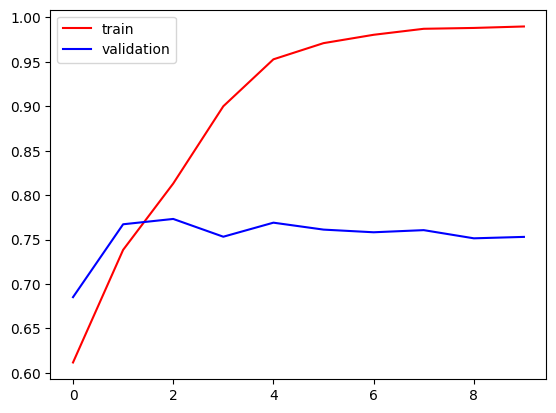

In [40]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color = 'red',label='train')
plt.plot(history.history['val_accuracy'],color = 'blue', label = 'validation')
plt.legend()
plt.show()

the gap in between red, blue tells about model is overfitting

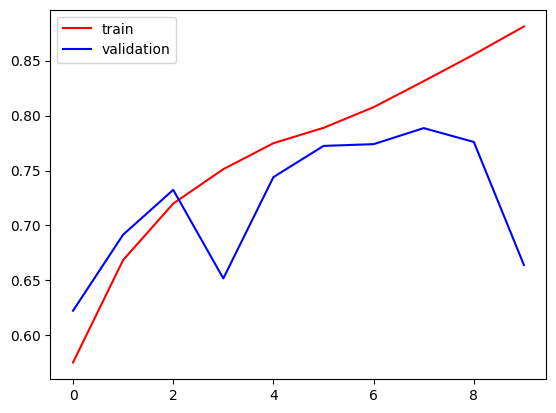

In [45]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color = 'red',label='train')
plt.plot(history.history['val_accuracy'],color = 'blue', label = 'validation')
plt.legend()
plt.show()

In [47]:
model.compile(optimizer = 'adam',loss='binary_crossentropy',metrics= ['accuracy'])

In [49]:
history=model.fit(train_ds,epochs=15,validation_data=test_ds)

Epoch 1/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 61s 97ms/step - accuracy: 0.6324 - loss: 0.7110 - val_accuracy: 0.7216 - val_loss: 0.5459
Epoch 2/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 60s 97ms/step - accuracy: 0.7387 - loss: 0.5330 - val_accuracy: 0.7728 - val_loss: 0.4727
Epoch 3/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 59s 94ms/step - accuracy: 0.7917 - loss: 0.4532 - val_accuracy: 0.7674 - val_loss: 0.5110
Epoch 4/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 63s 101ms/step - accuracy: 0.8294 - loss: 0.3876 - val_accuracy: 0.8082 - val_loss: 0.4350
Epoch 5/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 59s 95ms/step - accuracy: 0.8778 - loss: 0.2823 - val_accuracy: 0.8512 - val_loss: 0.3375
Epoch 6/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 97ms/step - accuracy: 0.9186 - loss: 0.2005 - val_accuracy: 0.7072 - val_loss: 1.4248
Epoch 7/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 59s 94ms/step - accuracy: 0.9427 - loss: 0.1426 - val_accuracy: 0.7842 - val_loss: 0.7694
Epoch 8/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 63s 100ms/step - accuracy: 0.9601 - loss: 0.1048 

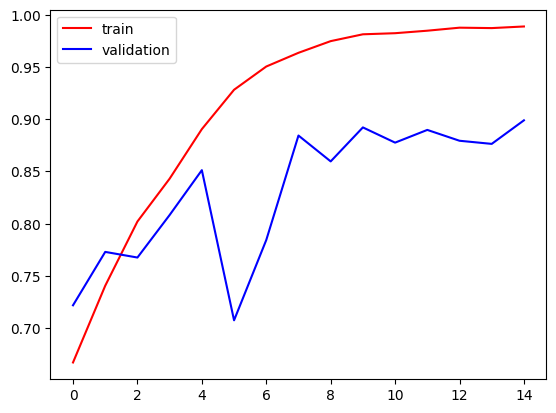

In [50]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color = 'red',label='train')
plt.plot(history.history['val_accuracy'],color = 'blue', label = 'validation')
plt.legend()
plt.show()

In [ ]:
# ways to reduce overfitting


# 1. data augmentation
# 2. add more data
# 3.L1/L2 regularizattion
# 4.Dropout
# 5. REduce complexity
# 6. Batch Norm

In [53]:
model.save("cat_dog_model.h5")
print("✅ Model saved successfully!")


✅ Model saved successfully!


In [51]:
!pip install gradio


In [54]:
import gradio as gr
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image

# 🔹 Load your saved model (make sure cat_dog_model.h5 is in your Colab working directory)
model = tf.keras.models.load_model("cat_dog_model.h5")

# 🔹 Define prediction function
def predict(img):
    img = img.resize((256, 256))                 # resize same as your model input
    img_array = image.img_to_array(img) / 255.0  # normalize
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)[0][0]
    label = "🐶 Dog" if prediction > 0.5 else "🐱 Cat"
    confidence = float(prediction if prediction > 0.5 else 1 - prediction)

    return {label: confidence}


In [57]:
interface = gr.Interface(
    fn=predict,
    inputs=gr.Image(type="pil"),
    outputs=gr.Label(num_top_classes=1),
    title="🐾 Cat vs Dog Identifier",
    description="Upload an image of a Cat or Dog and let the model predict!"
)

interface.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://7e64df0ee76e4960b3.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [56]:
interface = gr.Interface(
    fn=predict,
    inputs=gr.Image(type="pil", label="Upload your pet image 🐾"),
    outputs=gr.Label(label="Prediction"),
    examples=[
        ["cat_sample.jpg"],
        ["dog_sample.jpg"]
    ],
    title="🐶🐱 Cat vs Dog Classifier",
    description="A CNN model that identifies whether an image contains a cat or a dog."
)


In [58]:
!pip install streamlit pyngrok


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 93.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 145.0 MB/s eta 0:00:00


In [59]:
%%writefile app.py
import streamlit as st
import tensorflow as tf
import numpy as np
from PIL import Image

# Load model
model = tf.keras.models.load_model("cat_dog_model.h5")

st.title("🐾 Cat vs Dog Classifier")
st.write("Upload an image and let the model predict whether it's a cat or a dog!")

uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "jpeg", "png"])

if uploaded_file is not None:
    # Display uploaded image
    img = Image.open(uploaded_file)
    st.image(img, caption="Uploaded Image", use_column_width=True)

    # Preprocess image
    img = img.resize((256, 256))
    img_array = np.expand_dims(np.array(img) / 255.0, axis=0)

    # Predict
    prediction = model.predict(img_array)[0][0]
    label = "🐶 Dog" if prediction > 0.5 else "🐱 Cat"
    confidence = prediction if prediction > 0.5 else 1 - prediction

    st.markdown(f"### Prediction: **{label}**")
    st.progress(float(confidence))
    st.markdown(f"Confidence: **{confidence*100:.2f}%**")


Writing app.py


In [60]:
from pyngrok import ngrok
public_url = ngrok.connect(port=8501)
print("🌐 Streamlit App URL:", public_url)

!streamlit run app.py --server.port 8501


ERROR:pyngrok.process.ngrok:t=2025-11-05T08:18:26+0000 lvl=eror msg="failed to reconnect session" obj=tunnels.session err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n"
ERROR:pyngrok.process.ngrok:t=2025-11-05T08:18:26+0000 lvl=eror msg="session closing" obj=tunnels.session err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n"
ERROR:pyngrok.process.ngrok:t=2025-11-05T08:18:26+0000 lvl=eror msg="terminating with error" obj=app err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your aut

PyngrokNgrokError: The ngrok process errored on start: authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n.